# Approximate Clustering
> Another way to achieve similar result with [ColorClustering.ipynb](ColorClustering.ipynb)

[Back to <b>contents</b>](../README.md)

**The 25 clusters**  obtained using K-Means Clustering several times are actually the same as **the 25 clusters** with the farthest distance.

> Therefore, from an arbitrary point(ex rgb(0,0,0)), 25 colors are obtained by algorithm that takes a point far from the centers as the center.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import copy
import mycolor
%matplotlib inline

def load_shoe_data(filename):
  class ShoeData:
    data = []
    target = []
    feature_names = ['Name','Brand','Colors','Link','wish','review']
  shoes = ShoeData()
  with open(filename,'r', encoding ='utf-8') as f:
    for items in csv.reader(f):
      if items[0].startswith('#'): continue
      shoes.target.append(eval(items[2]))
      shoes.data.append(items)
    shoes.data = np.array(shoes.data)
    return shoes

# whow the plot in 3d from the data frame.
def show_data_3d(df):
  fig = plt.figure(figsize = (8, 8))
  ax2 = fig.add_subplot(111, projection='3d',xlabel ="R", ylabel ="G", zlabel ="B")
  ax2.set_title(f"Color Clustered (k = {k})", size = 20)
  for index, row in df.iterrows():
    ax2.scatter(row['R'], row['G'], row['B'], color = row['color']/255.0)
  plt.show()

# show 25 colors with form 5*5
def show_colors_2d(centers):
  arr_2d = copy.deepcopy(centers.tolist())
  mycolor.sort(arr_2d)
  arr_2d = np.reshape(arr_2d, (5,5,3))
  plt.imshow(arr_2d)

shoes = load_shoe_data('../data/shoes.csv')

The initial declaration part is the same as ColorClustering. However, the **rgb values ​​are added and sorted in ascending order** so that **black becomes the 0th index.**

In [40]:
data = []
for colors in shoes.target:
  RGBP = colors[0]
  RGB = np.array(RGBP[:-1])
  data.append(RGB)
data.sort(key=lambda rgb: rgb[0] + rgb[1] + rgb[2]);
df = pd.DataFrame(columns=['R','G','B'], data=data)
df

,R,G,B
0,9,9,10
1,16,14,14
2,15,16,16
3,18,14,16
4,16,16,16
...,...,...,...
995,237,235,234
996,237,236,234
997,237,235,237
998,235,240,240


Approximate_Clustering part

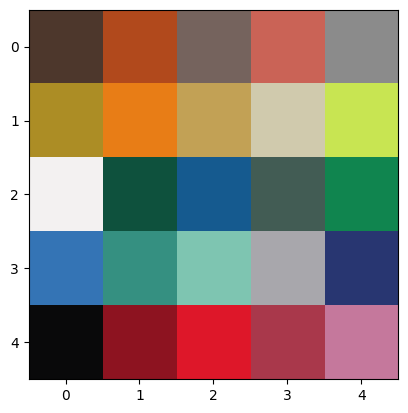

In [81]:
from math import dist

k = 25
class Point:
  def __init__(self,r,g,b):
    self.rgb = (r,g,b)
    self.isCenter = False

def make_center(idx):
  points[idx].isCenter = True
  centers.append(points[idx].rgb)

def get_min_center_dist(idx): #get minimum distance from centers
  dists = []
  for c in centers:
    dists.append(dist(c, points[idx].rgb))
  return min(dists)

def get_cluster(point): #get Cluster index
  distNidx = []
  for idx, c in enumerate(centers):
    distNidx.append((dist(c, point.rgb),idx))
  return min(distNidx)[1]
  
points, centers = [], []

for p in data:
  points.append(Point(*p))
  
make_center(0) #initial center
for i in range(1, k):
  dists = []
  for idx, p in enumerate(points):
    if not p.isCenter: 
      dists.append((get_min_center_dist(idx),idx))
  make_center(max(dists)[1])

centers = np.array(centers)
show_colors_2d(centers)


* 25 colors were obtained. Although it is slightly different from the previous result, evenly distributed colors can be obtained.

**2d Plot in ColorClstering.ipynb**

<img src="https://user-images.githubusercontent.com/67538999/206905496-a04a1cb6-1434-4a0c-b55c-dd70cd146e50.png">

* Now points are clustered with the above 25 colors and displayed as a 3d plot.

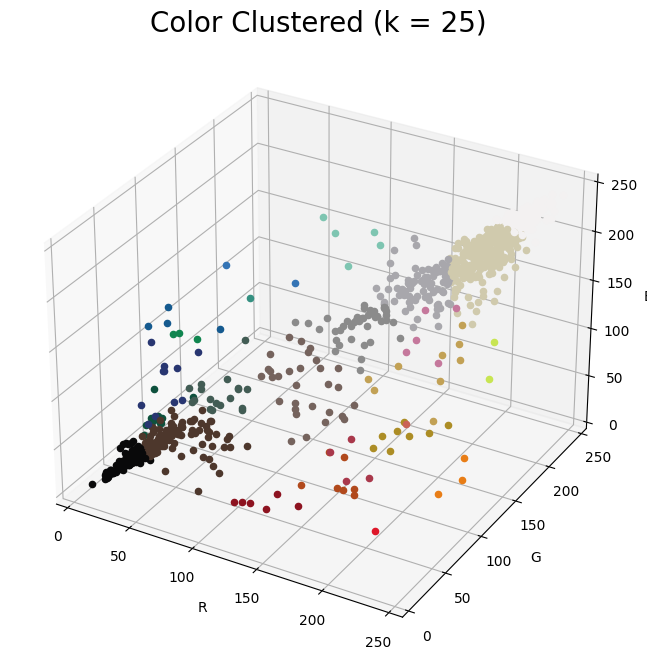

In [84]:
colors = []
for p in points:
  colors.append(centers[get_cluster(p)])
df['color'] = colors
show_data_3d(df)

**3d Plot in ColorClstering.ipynb**

<img src="https://user-images.githubusercontent.com/67538999/206906058-3343e847-aa7a-4f29-bd66-7e65267bd9aa.png">

Although the extracted colors are different, it is similar that the 25 colors are noticeably different from each other.

[Back to <b>contents</b>](../README.md)